In [4]:
import cv2
import numpy as np
import torch
from PIL import Image 

In [2]:
# incarc toate clasele din datasetul pe care a fost antrenat modelul
labels = open("coco.names.txt").read().strip().split("\n")
# generez o culoare pentru fiecare clasa in parte
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype="uint8")

In [3]:
# citeste imaginea
image = Image.open("image.jpg")
image.show()

In [5]:
# incarca modelul YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\alexb/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-3-28 Python-3.10.7 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
result = model(image)

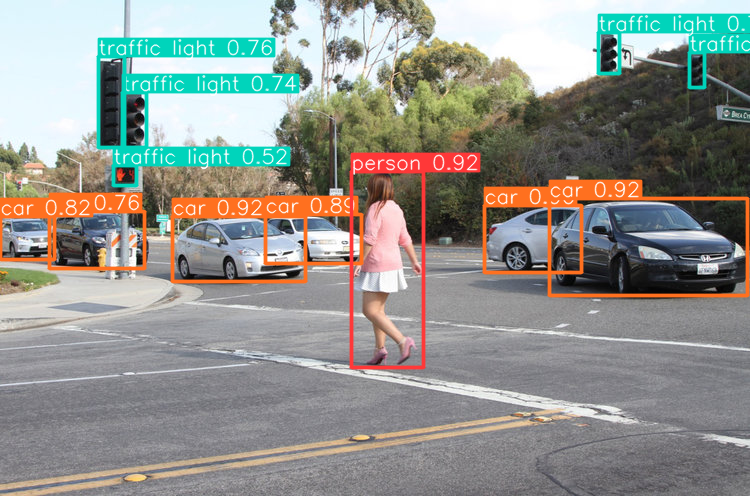

In [28]:
display(Image.fromarray(result.ims[0]))

In [30]:
results = result.pandas().xyxy[0]

In [31]:
results

,xmin,ymin,xmax,ymax,confidence,class,name
0,351.654297,171.564209,423.779053,367.539337,0.921385,0,person
1,172.648987,216.866714,305.540131,281.393860,0.920263,2,car
2,549.521606,198.647873,747.437012,295.361237,0.917074,2,car
3,484.795288,205.168457,581.763428,272.184906,0.899588,2,car
4,265.428802,214.024628,361.459076,263.134094,0.888215,2,car
5,0.000000,216.501404,54.831638,259.740753,0.821998,2,car
6,98.029236,56.465664,124.300537,147.585205,0.760111,9,traffic light
7,49.988434,211.035370,144.037094,268.886536,0.758818,2,car
8,122.771751,92.106750,146.175735,147.606644,0.741357,9,traffic light
9,598.937073,32.639904,619.524963,73.514580,0.735271,9,traffic light


In [34]:
for index, row in results.iterrows():
    "image = "